# Shark Attacks Analysis

<img src="files/toystoryshark.jpg">

## 1. Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import re

import warnings

warnings.filterwarnings('ignore')

## 2. Import CSV

In [2]:
# Read and convert the csv source data into a pandas dataframe.

# pd.set_option('display.max_columns', None)
sharks_attacks_analysis = pd.read_csv("sharks_attacks_final.csv")

In [3]:
sharks_attacks_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  4967 non-null   object 
 1   date         4967 non-null   object 
 2   year         4967 non-null   int64  
 3   type         4967 non-null   object 
 4   country      4954 non-null   object 
 5   area         4733 non-null   object 
 6   location     4697 non-null   object 
 7   activity     4967 non-null   object 
 8   name         4839 non-null   object 
 9   sex          4967 non-null   object 
 10  age          3169 non-null   float64
 11  injury       4953 non-null   object 
 12  fatal_(y/n)  4967 non-null   object 
 13  time         2775 non-null   object 
 14  species      4967 non-null   object 
 15  new_date     4967 non-null   object 
 16  month_year   4967 non-null   object 
dtypes: float64(1), int64(1), object(15)
memory usage: 659.8+ KB


## 3. Change value formats

#### "new_date" --> format='%Y.%m.%d'

In [4]:
sharks_attacks_analysis["new_date"] = pd.to_datetime(sharks_attacks_analysis["new_date"], format='%Y.%m.%d')

#### "type" ---> category

In [5]:
sharks_attacks_analysis["type"] = sharks_attacks_analysis["type"].astype("category")

#### "country" ---> category

In [6]:
sharks_attacks_analysis["country"] = sharks_attacks_analysis["country"].astype("category")

#### area, location, name are not going to be used

#### "activity" ---> category

In [7]:
sharks_attacks_analysis["activity"] = sharks_attacks_analysis["activity"].astype("category")

#### "sex" ---> category

In [8]:
sharks_attacks_analysis["sex"] = sharks_attacks_analysis["sex"].astype("category")

#### "age" ---> integer

In [9]:
sharks_attacks_analysis["age"] = pd.to_numeric(sharks_attacks_analysis["age"], errors='coerce')

#### injury is not going to be used

#### "fatal_(y/n)" ---> category

In [10]:
sharks_attacks_analysis["fatal_(y/n)"] = sharks_attacks_analysis["fatal_(y/n)"].astype("category")

#### "time" --->  format = "%H:%M"

In [11]:
sharks_attacks_analysis["time"] = pd.to_datetime(sharks_attacks_analysis["time"], format = "%H:%M", errors="coerce")

#### "species" ---> category

In [12]:
sharks_attacks_analysis["species"] = sharks_attacks_analysis["species"].astype("category")

#### "month_date" --->

In [13]:
sharks_attacks_analysis["month_year"] = pd.to_datetime(sharks_attacks_analysis["new_date"]).dt.to_period('M')

In [14]:
sharks_attacks_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   case_number  4967 non-null   object        
 1   date         4967 non-null   object        
 2   year         4967 non-null   int64         
 3   type         4967 non-null   category      
 4   country      4954 non-null   category      
 5   area         4733 non-null   object        
 6   location     4697 non-null   object        
 7   activity     4967 non-null   category      
 8   name         4839 non-null   object        
 9   sex          4967 non-null   category      
 10  age          3169 non-null   float64       
 11  injury       4953 non-null   object        
 12  fatal_(y/n)  4967 non-null   category      
 13  time         2239 non-null   datetime64[ns]
 14  species      4967 non-null   category      
 15  new_date     4967 non-null   datetime64[ns]
 16  month_

In [15]:
sharks_attacks_analysis.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,new_date,month_year
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Other,Julie Wolfe,Female,57.0,"No injury to occupant, outrigger canoe and pad...",N,1900-01-01 18:00:00,White Shark,2018-06-25,2018-06
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,Female,11.0,Minor injury to left thigh,N,NaT,Unknown,2018-06-18,2018-06
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,Male,48.0,Injury to left lower leg from surfboard skeg,N,1900-01-01 07:45:00,Unknown,2018-06-09,2018-06
3,2018.06.08,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,Male,NaN,Minor injury to lower leg,N,NaT,Other,2018-06-08,2018-06
4,2018.06.04,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Diving,Gustavo Ramos,Male,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaT,Tiger Shark,2018-06-04,2018-06


# 1) Hypothesis: Has the number of shark attacks increased during the years?

#### We going to filter the dataset with register only from 1950 onward

In [16]:
sharks_attacks_analysis = sharks_attacks_analysis[(sharks_attacks_analysis["year"]> 1950)]

In [17]:
sharks_attacks_historical = sharks_attacks_analysis.groupby('sex').year.value_counts()
sharks_attacks_historical

sex      year
Female   2017    40
         2007    28
         2015    27
         2014    23
         2010    22
                 ..
Unknown  1974     1
         1983     1
         1990     1
         2013     1
         2018     1
Name: year, Length: 195, dtype: int64

Text(0.5, 1.0, 'Shark attacks 1950 - 2018')

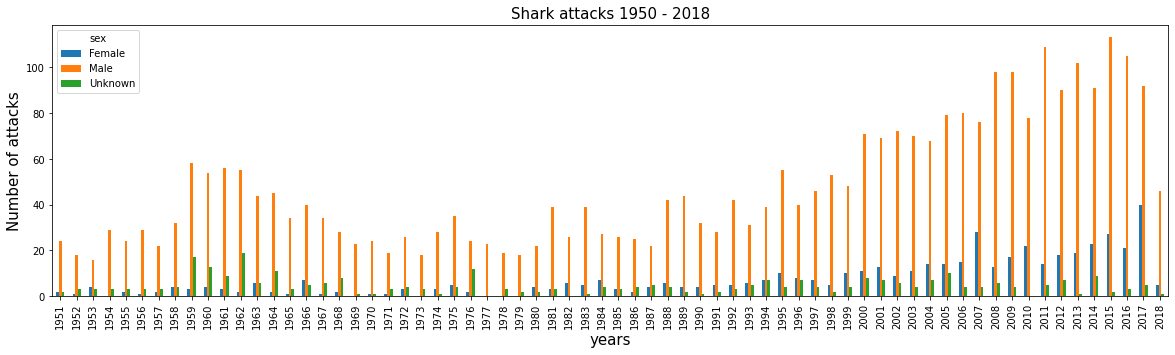

In [18]:
sharks_attacks_analysis.groupby('sex').year.value_counts().unstack(0).plot(kind='bar', stacked=False, figsize=(20, 5))


# #Set graph labels
plt.ylabel('Number of attacks', fontsize=15)
plt.xlabel('years', fontsize=15)
plt.title('Shark attacks 1950 - 2018', fontsize=15)


#### It seems it keeps incresing as year goes by and there's a significant difference between men and women although lately the number of cases for women has increased considerably (women in sports?)

# 2) Hypothesis: Activity vs Fatal. Are activities more risky than others?

In [19]:
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize": (12.,6.)})

Text(0.5, 1.0, 'Number of Fatal shark attacks by activity')

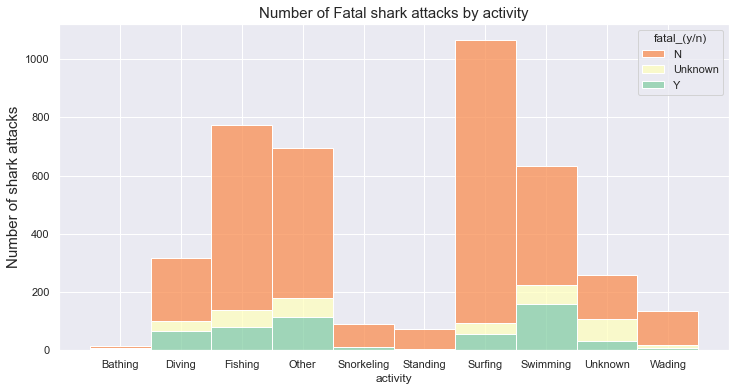

In [20]:
sns.histplot(data=sharks_attacks_analysis, x="activity", hue="fatal_(y/n)", multiple="stack", palette = "Spectral")
#Set graph labels
plt.ylabel('Number of shark attacks', fontsize=15)
plt.title('Number of Fatal shark attacks by activity', fontsize=15)


#### Swimming seems riskier than the rest and although there are more cases of shark attacks while people are surfing, they don't end up in death

# 3) Hypothesis: Are some shark species more dangerous than others?

In [21]:
# sharks_attacks_H3 = sharks_attacks_analysis[(sharks_attacks_analysis["species"] != "Unknown")]
# sharks_attacks_H3 = sharks_attacks_H3[(sharks_attacks_analysis["species"] != "Other")]

In [22]:
# sharks_attacks_H3.species.unique

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

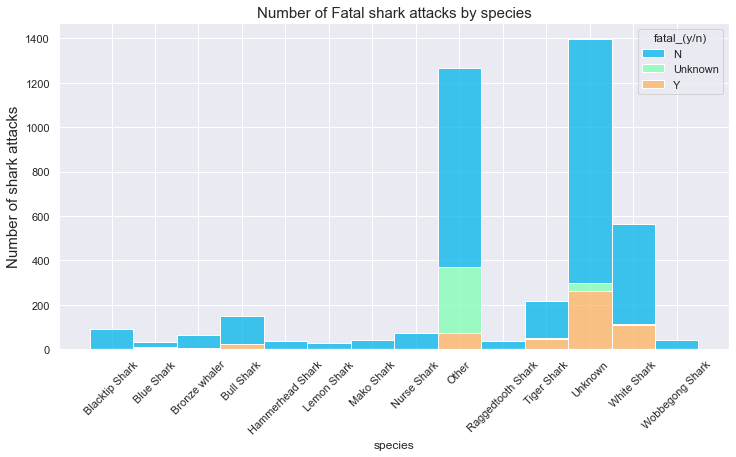

In [23]:
# sns.histplot(data=sharks_attacks_H3, x="species", hue="fatal_(y/n)", multiple="stack", palette = "rainbow")
sns.histplot(data=sharks_attacks_analysis, x="species", hue="fatal_(y/n)", multiple="stack", palette = "rainbow")

#Set graph labels
plt.ylabel('Number of shark attacks', fontsize=15)
plt.title('Number of Fatal shark attacks by species', fontsize=15)
plt.xticks(rotation=45)

#### White sharks seems to be the most dangerous species, maybe there are more number of white sharks in the world

# Other hypothesis: number of attacks by hour of the day (unfinished)

In [24]:
sharks_attacks_Other =  sharks_attacks_analysis["time"].value_counts()

In [25]:
# sns.scatterplot(x="time", data=sharks_attacks_analysis)

<AxesSubplot:xlabel='time', ylabel='Count'>

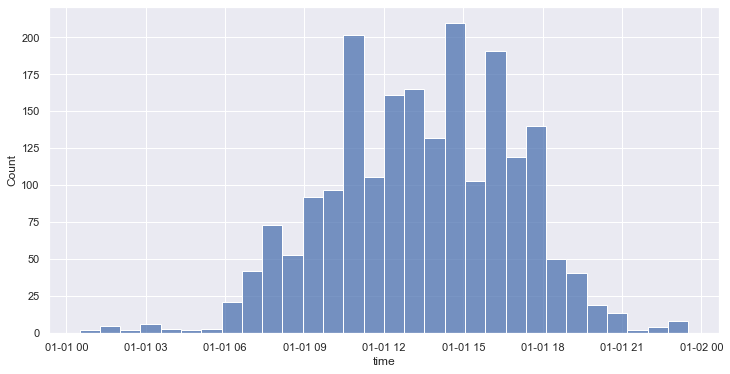

In [26]:
sns.histplot(data=sharks_attacks_analysis, x="time", multiple="stack")